# Cloning dataset

In [1]:
# This is our GitHub repository, all datasets are included in this repo
!git clone https://github.com/Alvin-Tan-Yi-Tung/Animal_Disease_Prediction.git

Cloning into 'Animal_Disease_Prediction'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 85 (delta 31), reused 70 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 6.94 MiB | 6.08 MiB/s, done.
Resolving deltas: 100% (31/31), done.


# Data Preparation

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Animal_Disease_Prediction/backend/wahis_outbreak_details.csv")
df

,country,location,lat_long,start_date,end_date,cases,deaths
0,Armenia,Sardarapat,"40.1239 , 44.0044",2025/08/04,2025/08/05,1,1
1,Armenia,Aygeshat,"40.227 , 44.2855",2025/07/29,2025/07/30,1,1
2,Namibia,Walvisbay Lagoon,"-22.96348 , 14.48727",2025/06/16,-,-,1
3,Thailand,Si Sa Ket,"14.951072 , 104.331852",2025/06/30,-,1,1
4,Thailand,Nakhon Ratchasima,"15.552079 , 102.777379",2025/06/23,-,1,1
...,...,...,...,...,...,...,...
2195,France,FONTENAY LE COMTE,"46.45964911 , -0.78859276",2007/11/23,2007/11/29,1,1
2196,Ecuador,San Juan de Bellavista,"-3.41489966 , -79.35188579",2007/03/12,2007/06/01,1,1
2197,Ecuador,Quebrada Honda,"-3.40597651 , -79.35171856",2007/02/20,2007/06/01,1,1
2198,Ecuador,San Carlos,"-0.19417301 , -76.51244951",2007/03/06,2007/08/17,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2200 non-null   object
 1   location    2200 non-null   object
 2   lat_long    2200 non-null   object
 3   start_date  2200 non-null   object
 4   end_date    2200 non-null   object
 5   cases       2200 non-null   object
 6   deaths      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


# Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert dates (string dates to datetime objects & missing end dates become NaT)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Handle ongoing outbreaks (to indicate whether the outbreak is still active or not)
df['is_ongoing'] = df['end_date'].isna()

# Calculate the duration of on-going outbreak (output is integer days)
df['duration'] = (df['end_date'].fillna(pd.Timestamp.today()) - df['start_date']).dt.days

# Extract location features (split into two float columns)
df[['latitude', 'longitude']] = df['lat_long'].str.split(',', expand=True).astype(float)

# Convert cases and deaths to numeric
df['cases'] = pd.to_numeric(df['cases'], errors='coerce')
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')

# Fill the "-" with 0
df['cases'] = df['cases'].fillna(0)
df['deaths'] = df['deaths'].fillna(0)

# Feature engineering
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['week'] = df['start_date'].dt.isocalendar().week

# Country encoding
country_encoder = LabelEncoder()
df['country_code'] = country_encoder.fit_transform(df['country'])

print(df.head().to_string())

    country           location                lat_long start_date   end_date  cases  deaths  is_ongoing  duration   latitude   longitude  year  month  week  country_code
0   Armenia         Sardarapat       40.1239 , 44.0044 2025-08-04 2025-08-05    1.0     1.0       False         1  40.123900   44.004400  2025      8    32             2
1   Armenia           Aygeshat        40.227 , 44.2855 2025-07-29 2025-07-30    1.0     1.0       False         1  40.227000   44.285500  2025      7    31             2
2   Namibia   Walvisbay Lagoon    -22.96348 , 14.48727 2025-06-16        NaT    0.0     1.0        True        70 -22.963480   14.487270  2025      6    25            34
3  Thailand          Si Sa Ket  14.951072 , 104.331852 2025-06-30        NaT    1.0     1.0        True        56  14.951072  104.331852  2025      6    27            44
4  Thailand  Nakhon Ratchasima  15.552079 , 102.777379 2025-06-23        NaT    1.0     1.0        True        63  15.552079  102.777379  2025      6 

In [5]:
# View the data types of columns (after preprocessing)
print(df.dtypes)

country                 object
location                object
lat_long                object
start_date      datetime64[ns]
end_date        datetime64[ns]
cases                  float64
deaths                 float64
is_ongoing                bool
duration                 int64
latitude               float64
longitude              float64
year                     int32
month                    int32
week                    UInt32
country_code             int64
dtype: object


In [6]:
# View missing values for each column
print(df.isna().sum())

country           0
location          0
lat_long          0
start_date        0
end_date        336
cases             0
deaths            0
is_ongoing        0
duration          0
latitude          0
longitude         0
year              0
month             0
week              0
country_code      0
dtype: int64


In [7]:
# View the encoder of country
print(f"Encoded {len(country_encoder.classes_)} countries:")
print(country_encoder.classes_[:])

Encoded 48 countries:
['Albania' 'Argentina' 'Armenia' 'Bangladesh' 'Belgium' 'Bhutan'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Cambodia' 'Canada' 'Ceuta'
 'Chile' 'Chinese Taipei' 'Congo (Rep. of the)' 'Ecuador' 'Egypt'
 'El Salvador' 'Finland' 'France' 'French Guiana' 'Germany' 'Greece'
 'Honduras' 'Hungary' 'Indonesia' 'Italy' 'Kazakhstan' 'Liberia' 'Libya'
 'Lithuania' 'Malaysia' 'Melilla' 'Moldova' 'Myanmar' 'Namibia'
 'Netherlands' 'Nigeria' 'North Macedonia' 'Norway' 'Palestine' 'Slovakia'
 'South Africa' 'Spain' 'Sweden' 'Thailand' 'Timor-Leste'
 'United States of America' 'Uruguay']


# Data Preprocessing (for training)

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- helpers ---
def _freq_from_interval(interval: str) -> str:
    interval = interval.lower()
    if interval == "weekly":
        return "W"     # week-end frequency
    if interval == "monthly":
        return "M"     # month-end
    if interval == "annually":
        return "A-DEC" # year-end (December)
    raise ValueError("interval must be one of: 'weekly', 'monthly', 'annually'")


# --- main builder: uniform panel with zero-fill for missing periods ---
def build_regular_panel(
    df: pd.DataFrame,
    interval: str = "weekly",
    start_date: str | pd.Timestamp | None = None,
    end_date: str | pd.Timestamp | None = None,
    country_col: str = "country",
    target_col: str = "outbreak_count",
    countries_list: list[str] | None = None
) -> tuple[pd.DataFrame, pd.DatetimeIndex, LabelEncoder]:
    """
    Returns a panel with identical timeline for each country:
      columns: [country, start_date, outbreak_count, country_id]
      every (country, start_date) exists; missing periods are filled with 0.
    """
    df = df.copy()
    df["start_date"] = pd.to_datetime(df["start_date"])

    # ✅ Step 1: If outbreak_count not in df, assign 1 for each outbreak record
    if target_col not in df.columns:
        df[target_col] = 1

    # Keep only needed columns
    needed = [country_col, "start_date", target_col]
    missing = [c for c in needed if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    # Optionally restrict to a known set of countries
    if countries_list is not None:
        df = df[df[country_col].isin(countries_list)].copy()

    # Determine global date range
    global_min = df["start_date"].min() if start_date is None else pd.to_datetime(start_date)
    global_max = df["start_date"].max() if end_date   is None else pd.to_datetime(end_date)
    if pd.isna(global_min) or pd.isna(global_max):
        raise ValueError("No dates found in df after filtering.")

    freq = _freq_from_interval(interval)
    full_range = pd.date_range(start=global_min, end=global_max, freq=freq)

    # ✅ Step 2: Aggregate outbreaks into the chosen frequency
    grouped = (
        df
        .groupby([country_col, pd.Grouper(key="start_date", freq=freq)])[target_col]
        .sum()
        .rename(target_col)
        .to_frame()
    )

    # Build full index (every country x every start_date in full_range)
    countries = countries_list if countries_list is not None else sorted(df[country_col].unique())
    full_index = pd.MultiIndex.from_product([countries, full_range], names=[country_col, "start_date"])

    panel = (
        grouped
        .reindex(full_index, fill_value=0)  # enforce identical length + fill missing with 0
        .reset_index()
    )

    # Encode countries
    le = LabelEncoder()
    panel["country_id"] = le.fit_transform(panel[country_col])

    return panel, full_range, le


In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def create_lstm_sequences_from_panel(
    panel: pd.DataFrame,
    time_steps: int = 12,
    target_col: str = "outbreak_count",
    country_id_col: str = "country_id",
    start_col: str = "start_date" # Keep only start_date as it's present in the panel
) -> tuple[np.ndarray, np.ndarray, np.ndarray, MinMaxScaler]:
    """
    Prepares balanced LSTM sequences from outbreak panel data.

    Expected input columns:
      - country_id_col (e.g. 'country_id')
      - start_col (e.g. 'start_date')
      - target_col (e.g. 'cases' or 'outbreak_count')

    Logic:
      - Build uniform date ranges per country based on available start_dates.
      - Missing dates get target_col=0.
      - Produces sequences of length `time_steps`.

    Returns:
      X   : (samples, time_steps, 1)
      y   : (samples,)
      cids: (samples,) country ids aligned with y
      scaler fitted on the entire panel's target_col
    """
    panel = panel.copy()
    panel[start_col] = pd.to_datetime(panel[start_col])

    # Global scaling
    scaler = MinMaxScaler()
    panel["target_scaled"] = scaler.fit_transform(panel[[target_col]])

    X, y, cids = [], [], []

    # Sequences per country
    for cid, grp in panel.groupby(country_id_col, sort=True):
        vals = grp.sort_values(start_col)["target_scaled"].to_numpy() # Sort by start_date to ensure correct sequence order
        if len(vals) <= time_steps:
            continue
        for i in range(len(vals) - time_steps):
            X.append(vals[i:i+time_steps].reshape(time_steps, 1))
            y.append(vals[i+time_steps])
            cids.append(cid)

    X = np.asarray(X, dtype=np.float32)
    y = np.asarray(y, dtype=np.float32)
    cids = np.asarray(cids, dtype=np.int32)
    return X, y, cids, scaler

In [53]:
# 1) Build uniform panel (choose interval + global date range)
countries_48 = [
 'Albania','Argentina','Armenia','Bangladesh','Belgium','Bhutan',
 'Bosnia and Herzegovina','Burkina Faso','Cambodia','Canada','Ceuta',
 'Chile','Chinese Taipei','Congo (Rep. of the)','Ecuador','Egypt',
 'El Salvador','Finland','France','French Guiana','Germany','Greece',
 'Honduras','Hungary','Indonesia','Italy','Kazakhstan','Liberia','Libya',
 'Lithuania','Malaysia','Melilla','Moldova','Myanmar','Namibia',
 'Netherlands','Nigeria','North Macedonia','Norway','Palestine','Slovakia',
 'South Africa','Spain','Sweden','Thailand','Timor-Leste',
 'United States of America','Uruguay'
]

panel, full_range, label_encoder = build_regular_panel(
    df,                      # expects columns: ['date' or 'start_date', 'country', 'outbreak_count', ...]
    interval="monthly",      # 'weekly' | 'monthly' | 'annually'
    start_date=None,         # or '2010-01-01'
    end_date=None,           # or '2024-12-31'
    country_col="country",
    target_col="outbreak_count",
    countries_list=countries_48
)

# 2) Create sequences (uniform across all countries)
X_seq, y_seq, country_ids, scaler = create_lstm_sequences_from_panel(
    panel,
    time_steps=12,           # e.g., 24 for weekly; 12 for monthly; 5 for annually
    target_col="outbreak_count",
    country_id_col="country_id"
)

print("X_seq:", X_seq.shape)         # (samples, time_steps, 1)
print("y_seq:", y_seq.shape)         # (samples,)
print("country_ids:", country_ids.shape)


X_seq: (10080, 12, 1)
y_seq: (10080,)
country_ids: (10080,)


/tmp/ipython-input-639596957.py:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range(start=global_min, end=global_max, freq=freq)
/tmp/ipython-input-639596957.py:61: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([country_col, pd.Grouper(key="start_date", freq=freq)])[target_col]


In [56]:
# View the columns of the panel DataFrame
print(panel.columns)

# View the head of the panel DataFrame
print(panel.head().to_string())

print(panel.info())

Index(['country', 'start_date', 'outbreak_count', 'country_id'], dtype='object')
   country start_date  outbreak_count  country_id
0  Albania 2007-02-28               0           0
1  Albania 2007-03-31               0           0
2  Albania 2007-04-30               0           0
3  Albania 2007-05-31               0           0
4  Albania 2007-06-30               0           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         10656 non-null  object        
 1   start_date      10656 non-null  datetime64[ns]
 2   outbreak_count  10656 non-null  int64         
 3   country_id      10656 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 333.1+ KB
None


# Split the dataset

In [57]:
import numpy as np

n = len(X_seq)
train_end = int(0.7 * n)
val_end   = int(0.85 * n)

X_train, y_train = X_seq[:train_end], y_seq[:train_end]
X_val,   y_val   = X_seq[train_end:val_end], y_seq[train_end:val_end]
X_test,  y_test  = X_seq[val_end:], y_seq[val_end:]

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (7056, 12, 1) (7056,)
Val  : (1512, 12, 1) (1512,)
Test : (1512, 12, 1) (1512,)


# Model Building

In [99]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_lstm_model(input_shape):
    inputs = layers.Input(shape=input_shape)          # (time_steps, 1)
    x = layers.LSTM(128, return_sequences=True)(inputs)

    # x = layers.LSTM(128, return_sequences=True)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.LSTM(64)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(32, activation='relu')(x)

    outputs = layers.Dense(1, activation='linear')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='mse', metrics=['mae', 'mse'])

    # def weighted_mse(y_true, y_pred):
    #   weights = tf.where(y_true > 0, 5.0, 1.0)  # emphasize outbreaks
    #   return tf.reduce_mean(weights * tf.square(y_true - y_pred))

    # model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
    #           loss=weighted_mse,
    #           metrics=['mae', 'mse'])

    # model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
    #           loss=tf.keras.losses.Huber(),
    #           metrics=['mae', 'mse'])

    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,241 (477.50 KB)

 Trainable params: 122,241 (477.50 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [100]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
    )
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7.9811e-04 - mae: 0.0073 - mse: 7.9811e-04 - val_loss: 2.5773e-05 - val_mae: 0.0048 - val_mse: 2.5773e-05 - learning_rate: 0.0010
Epoch 2/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016 - mae: 0.0097 - mse: 0.0016 - val_loss: 1.3854e-05 - val_mae: 0.0025 - val_mse: 1.3854e-05 - learning_rate: 0.0010
Epoch 3/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.0617e-04 - mae: 0.0039 - mse: 3.0617e-04 - val_loss: 2.0629e-05 - val_mae: 0.0036 - val_mse: 2.0629e-05 - learning_rate: 0.0010
Epoch 4/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.9860e-04 - mae: 0.0044 - mse: 2.9860e-04 - val_loss: 7.6360e-06 - val_mae: 0.0010 - val_mse: 7.6360e-06 - learning_rate: 0.0010
Epoch 5/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.7790e-04 - mae: 0.0049 - mse: 3.7790e-04 - val_loss: 1.8993e-05 - val_mae: 0.0034 - val_mse: 1.8993e-05 - learning_rate: 0.0010
Epoch 6/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

# Model Evaluation

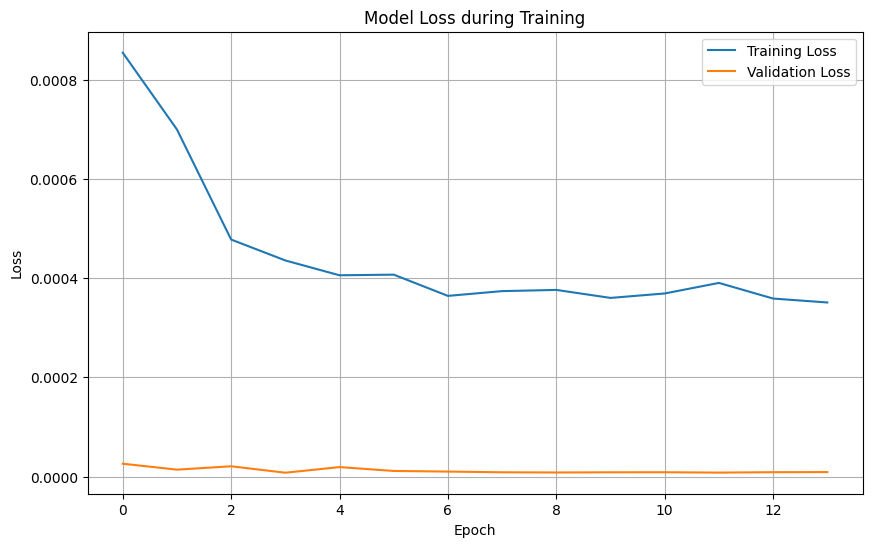

In [101]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
import numpy as np

# Scaled metrics
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Scaled → MAE={test_mae:.4f}, RMSE={np.sqrt(test_mse):.4f}")

# Inverse-scale predictions and ground truth
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = np.mean(np.abs(y_pred - y_true))
rmse = np.sqrt(np.mean((y_pred - y_true)**2))
print(f"Actual units → MAE={mae:.4f}, RMSE={rmse:.4f}")


Scaled → MAE=0.0020, RMSE=0.0143
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Actual units → MAE=0.1508, RMSE=1.0731


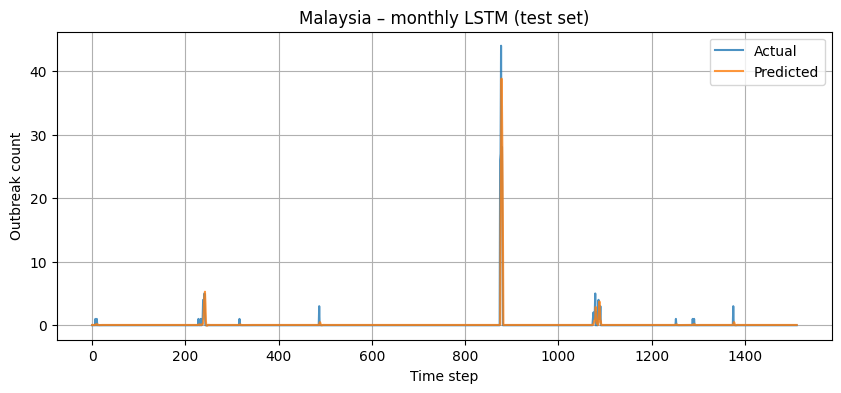

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_true, label="Actual", alpha=0.8)
plt.plot(y_pred, label="Predicted", alpha=0.8)
plt.title(f"{country} – {interval} LSTM (test set)")
plt.xlabel("Time step")
plt.ylabel("Outbreak count")
plt.legend()
plt.grid(True)
plt.show()


Plotting predictions for 8 unique countries in the test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


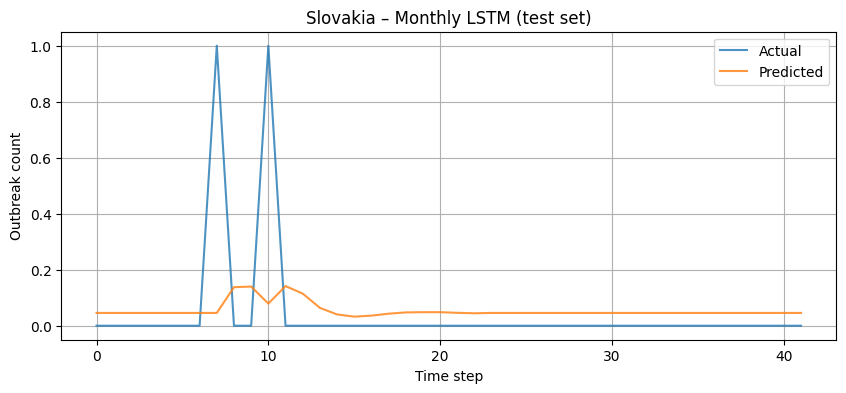

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


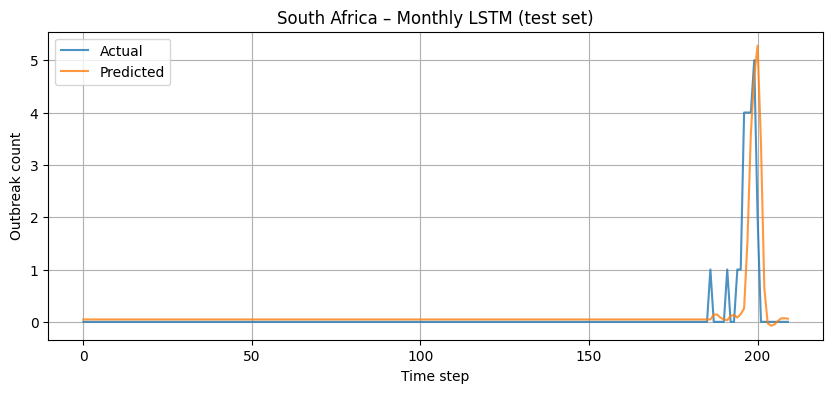

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


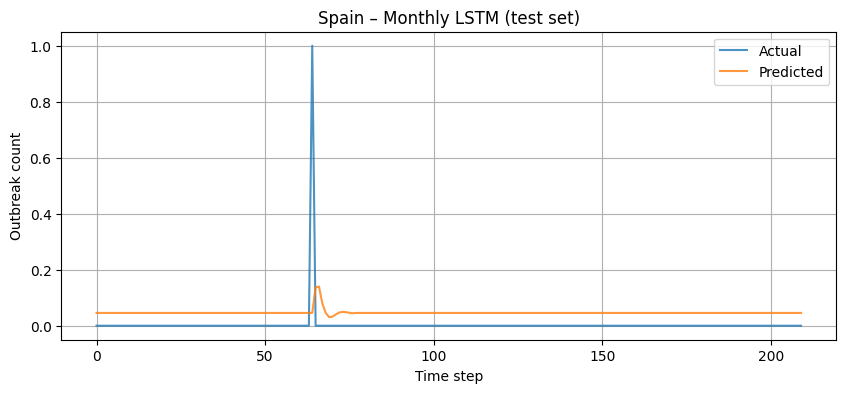

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


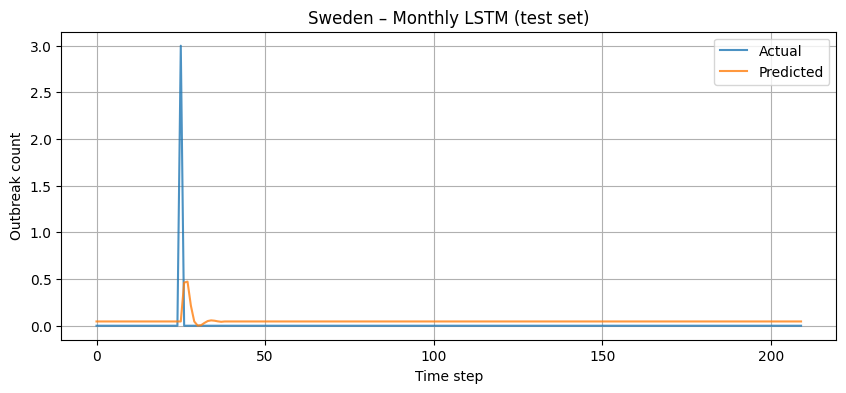

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


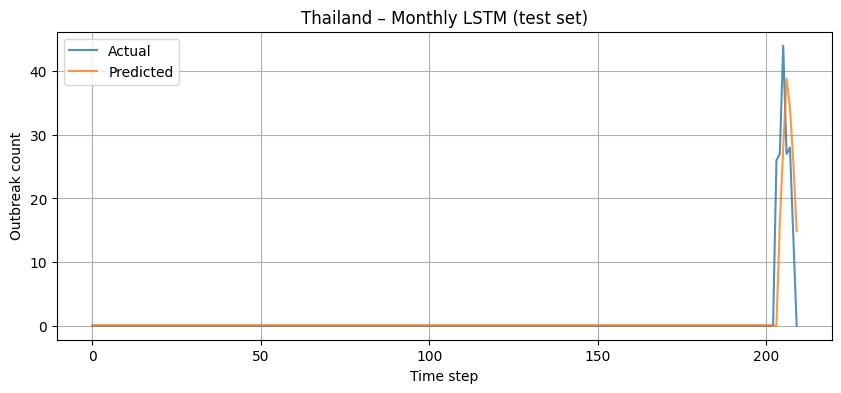

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


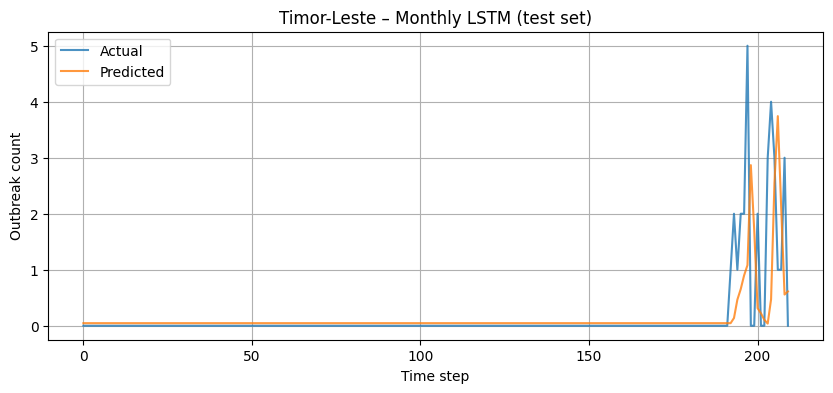

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


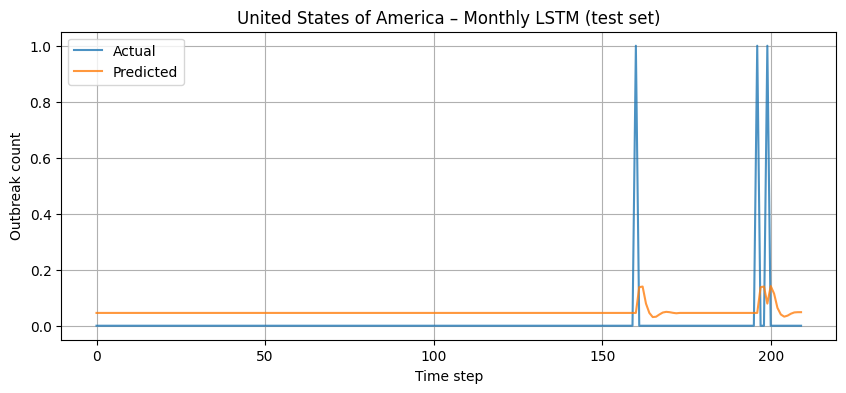

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


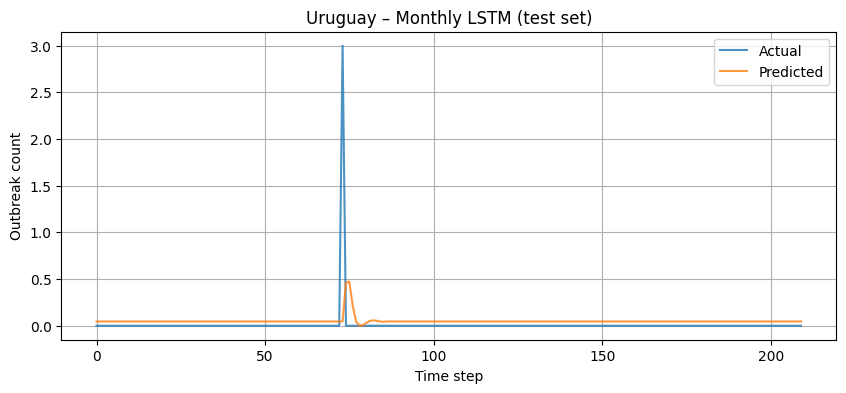

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique country IDs in the test set
unique_country_ids_test = np.unique(country_ids[val_end:])

print(f"Plotting predictions for {len(unique_country_ids_test)} unique countries in the test set:")

for country_id in unique_country_ids_test:
    # Get the country name from the label encoder
    country_name = label_encoder.inverse_transform([country_id])[0]

    # Filter the test set for the current country ID
    country_indices = np.where(country_ids[val_end:] == country_id)[0]
    X_test_country = X_test[country_indices]
    y_test_country = y_test[country_indices]

    # Check if there is any data for the country in the test set
    if X_test_country.shape[0] == 0:
        print(f"No test data available for {country_name} in the specified time steps.")
        continue

    # Inverse-scale predictions and ground truth for the current country
    y_pred_scaled_country = model.predict(X_test_country)
    y_pred_country = scaler.inverse_transform(y_pred_scaled_country)
    y_true_country = scaler.inverse_transform(y_test_country.reshape(-1, 1))

    plt.figure(figsize=(10,4))
    plt.plot(y_true_country, label="Actual", alpha=0.8)
    plt.plot(y_pred_country, label="Predicted", alpha=0.8)
    plt.title(f"{country_name} – {'Monthly'} LSTM (test set)") # Assuming 'interval' is monthly
    plt.xlabel("Time step")
    plt.ylabel("Outbreak count")
    plt.legend()
    plt.grid(True)
    plt.show()

# Model Prediction

In [104]:
def forecast_n_steps(model, last_window_scaled, scaler, n_steps=6):
    """
    last_window_scaled: shape (time_steps, 1) from the end of your series (scaled)
    Returns inverse-scaled predictions of length n_steps.
    """
    window = last_window_scaled.copy().reshape(1, -1, 1)
    preds = []
    for _ in range(n_steps):
        next_scaled = model.predict(window, verbose=0)        # (1,1)
        preds.append(next_scaled[0,0])
        # slide window
        window = np.concatenate([window[:,1:,:], next_scaled.reshape(1,1,1)], axis=1)
    preds = np.array(preds).reshape(-1, 1)
    return scaler.inverse_transform(preds).flatten()

# Use the last window from *all* data (train+val+test)
last_window_scaled = X_seq[-1]          # shape (time_steps, 1)
future_counts = forecast_n_steps(model, last_window_scaled, scaler, n_steps=6)
print("Next 6 periods (actual units):", future_counts)


Next 6 periods (actual units): [0.04570023 0.04860407 0.05171027 0.05353962 0.05394432 0.05350972]


In [117]:
import os

# Create a directory to save the model and data
save_dir = "animal_disease_model_and_data"
os.makedirs(save_dir, exist_ok=True)

# Save the trained model
model_save_path = os.path.join(save_dir, "lstm_model.keras")
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

# Save the preprocessed panel data
panel_save_path = os.path.join(save_dir, "processed_panel_data.csv")
panel.to_csv(panel_save_path, index=False)
print(f"Processed panel data saved to: {panel_save_path}")

Model saved to: animal_disease_model_and_data/lstm_model.keras
Processed panel data saved to: animal_disease_model_and_data/processed_panel_data.csv


In [119]:
print("Input to the model (X_seq):")
print("Features used as input: Scaled outbreak count")
print("Shape:", X_seq.shape)
print("Data type:", X_seq.dtype)

print("\nOutput from the model (y_pred - inverse scaled):")
print("Shape:", y_pred.shape)
print("Data type:", y_pred.dtype)

Input to the model (X_seq):
Features used as input: Scaled outbreak count
Shape: (10080, 12, 1)
Data type: float32

Output from the model (y_pred - inverse scaled):
Shape: (1512, 1)
Data type: float32
